In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [ ]:
from scipy.stats import zscore

#### Correcting mismatching tissue titles and preparing data for R

In [ ]:
age = pd.read_csv('/content/drive/MyDrive/Ageing_bulk_raw_nona_sorted.csv', sep=',')
age

,Dataset,Day,Tissue,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
0,GSE132040,30,Limb,2286,16,1,6,32600,874,104,...,11,0,3,0,5,0,0,140,2,25
1,GSE132040,30,Skin,3768,213,17,85,1,889,2171,...,2,0,9,0,1,0,0,182,9,79
2,GSE132040,30,Marrow,931,99,30,6,3,334,9738,...,1,4,6,0,0,0,1,90,20,16
3,GSE132040,30,Spleen,188,7,1,6,13,511,3,...,0,0,0,0,0,0,0,5,1,1
4,GSE132040,30,Lung,361,53,1045,5,21,3665,964,...,7,0,10,0,7,0,0,118,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,GSE75192,900,Brain,1770,97,3,60,9,2416,1799,...,93,0,0,0,214,0,0,574,354,199
1123,GSE75192,900,Brain,1127,54,0,38,10,2001,1255,...,98,0,1,1,83,0,0,375,171,137
1124,GSE75192,900,Brain,1344,56,2,54,8,1949,1347,...,71,0,1,0,115,0,0,458,311,175
1125,GSE75192,900,Brain,1423,75,5,53,8,2538,2298,...,156,0,0,0,82,1,0,546,139,205


Correcting discrepancies in tissue names:

In [ ]:
age['Tissue'] = age['Tissue'].replace('Small', 'Intestine')
age['Tissue'] = age['Tissue'].replace('Limb', 'Muscle')
age['Tissue'] = age['Tissue'].replace('Liver ', 'Liver')
age['Tissue'] = age['Tissue'].replace('Skin ', 'Skin')
age['Tissue'] = age['Tissue'].replace('Blood ', 'Blood')

In [ ]:
age

,Dataset,Day,Tissue,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
0,GSE132040,30,Muscle,2286,16,1,6,32600,874,104,...,11,0,3,0,5,0,0,140,2,25
1,GSE132040,30,Skin,3768,213,17,85,1,889,2171,...,2,0,9,0,1,0,0,182,9,79
2,GSE132040,30,Marrow,931,99,30,6,3,334,9738,...,1,4,6,0,0,0,1,90,20,16
3,GSE132040,30,Spleen,188,7,1,6,13,511,3,...,0,0,0,0,0,0,0,5,1,1
4,GSE132040,30,Lung,361,53,1045,5,21,3665,964,...,7,0,10,0,7,0,0,118,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,GSE75192,900,Brain,1770,97,3,60,9,2416,1799,...,93,0,0,0,214,0,0,574,354,199
1123,GSE75192,900,Brain,1127,54,0,38,10,2001,1255,...,98,0,1,1,83,0,0,375,171,137
1124,GSE75192,900,Brain,1344,56,2,54,8,1949,1347,...,71,0,1,0,115,0,0,458,311,175
1125,GSE75192,900,Brain,1423,75,5,53,8,2538,2298,...,156,0,0,0,82,1,0,546,139,205


Preparing data for ComBat-seq, DESeq2, VST in R - creating counts and matrix:

In [ ]:
metadata_cols = ['Dataset', 'Day', 'Tissue']
metadata = age[metadata_cols]
counts = age.drop(columns=metadata_cols)

age['SampleID'] = ['Sample_' + str(i) for i in range(len(age))]

metadata.index = age['SampleID']
counts.index = age['SampleID']

In [ ]:
age['SampleID'] = ['Sample_' + str(i) for i in range(len(age))]
metadata_cols = ['Dataset', 'Day', 'Tissue']
metadata = age[metadata_cols]
metadata.index = age['SampleID']

In [ ]:
metadata.to_csv("metadata.csv")

In [ ]:
counts = counts.T

In [ ]:
counts.to_csv("counts_matrix.csv")

In [ ]:
counts

SampleID,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_1117,Sample_1118,Sample_1119,Sample_1120,Sample_1121,Sample_1122,Sample_1123,Sample_1124,Sample_1125,Sample_1126
ENSMUSG00000000001,2286,3768,931,188,361,790,1599,756,1671,2468,...,4447,4540,1991,1827,1603,1770,1127,1344,1423,1705
ENSMUSG00000000028,16,213,99,7,53,134,67,36,54,72,...,207,182,86,104,83,97,54,56,75,25
ENSMUSG00000000031,1,17,30,1,1045,9,0,18,1120,0,...,8309,11247,7,9,8,3,0,2,5,162
ENSMUSG00000000037,6,85,6,6,5,22,47,55,39,8,...,139,118,71,41,61,60,38,54,53,1
ENSMUSG00000000049,32600,1,3,13,21,48,12,64,5,29,...,24,16,13,16,8,9,10,8,8,34687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000096900,0,0,0,0,0,6,4,0,0,2,...,0,0,0,0,0,0,0,0,1,0
ENSMUSG00000096908,0,0,1,0,0,2,1,0,5,0,...,1,0,0,1,0,0,0,0,0,1
ENSMUSG00000096910,140,182,90,5,118,78,148,371,128,69,...,180,163,614,594,467,574,375,458,546,51
ENSMUSG00000096914,2,9,20,1,1,30,80,540,16,10,...,0,0,264,362,361,354,171,311,139,0


#### Further we plot PCA, t-SNE, UMAP for different types of data harmonization

Read corrected counts after running ComBat-seq (or else) in R:

In [ ]:
cs_counts = pd.read_csv('/content/combatseq_corrected_counts.csv', sep=',')

In [ ]:
cs_counts

,Unnamed: 0,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,...,Sample_1117,Sample_1118,Sample_1119,Sample_1120,Sample_1121,Sample_1122,Sample_1123,Sample_1124,Sample_1125,Sample_1126
0,ENSMUSG00000000001,2370,3264,1015,297,573,794,1567,977,1615,...,5343,5354,2822,2688,2346,2597,1643,2003,2024,2179
1,ENSMUSG00000000028,45,176,99,20,82,102,78,65,68,...,694,609,269,327,260,305,168,171,238,75
2,ENSMUSG00000000031,1,34,48,1,789,18,0,39,786,...,905,1168,4,5,5,3,0,2,3,34
3,ENSMUSG00000000037,8,74,8,7,7,21,43,52,36,...,235,203,151,107,134,137,86,120,112,1
4,ENSMUSG00000000049,19022,1,17,45,77,96,45,162,25,...,33,24,23,27,16,18,17,16,15,5239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21681,ENSMUSG00000096900,0,0,0,0,0,5,4,0,0,...,0,0,0,0,0,0,0,0,1,0
21682,ENSMUSG00000096908,0,0,1,0,0,2,1,0,4,...,1,0,0,1,0,0,0,0,0,1
21683,ENSMUSG00000096910,139,180,89,5,117,78,147,367,127,...,321,290,804,807,649,777,500,625,681,116
21684,ENSMUSG00000096914,1,2,5,1,1,15,52,663,4,...,0,0,792,993,930,963,515,822,481,0


In [ ]:
cs_counts = cs_counts.set_index(cs_counts.columns[0])
cs_counts

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_1117,Sample_1118,Sample_1119,Sample_1120,Sample_1121,Sample_1122,Sample_1123,Sample_1124,Sample_1125,Sample_1126
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,2370,3264,1015,297,573,794,1567,977,1615,2296,...,5343,5354,2822,2688,2346,2597,1643,2003,2024,2179
ENSMUSG00000000028,45,176,99,20,82,102,78,65,68,87,...,694,609,269,327,260,305,168,171,238,75
ENSMUSG00000000031,1,34,48,1,789,18,0,39,786,0,...,905,1168,4,5,5,3,0,2,3,34
ENSMUSG00000000037,8,74,8,7,7,21,43,52,36,10,...,235,203,151,107,134,137,86,120,112,1
ENSMUSG00000000049,19022,1,17,45,77,96,45,162,25,86,...,33,24,23,27,16,18,17,16,15,5239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000096900,0,0,0,0,0,5,4,0,0,2,...,0,0,0,0,0,0,0,0,1,0
ENSMUSG00000096908,0,0,1,0,0,2,1,0,4,0,...,1,0,0,1,0,0,0,0,0,1
ENSMUSG00000096910,139,180,89,5,117,78,147,367,127,68,...,321,290,804,807,649,777,500,625,681,116


In [ ]:
cs_t = cs_counts.T
cs_t = cs_t.reset_index()
cs_t = cs_t.set_index(cs_t.columns[0])
cs_t

Unnamed: 0,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
index,,,,,,,,,,,,,,,,,,,,,
Sample_0,2370,45,1,8,19022,974,302,430,210,2203,...,13,0,2,0,12,0,0,139,1,34
Sample_1,3264,176,34,74,1,837,1777,1546,444,1155,...,4,0,4,0,1,0,0,180,2,72
Sample_2,1015,99,48,8,17,414,5308,1207,282,1123,...,1,3,3,0,0,0,1,89,5,21
Sample_3,297,20,1,7,45,512,26,262,36,967,...,0,0,0,0,0,0,0,5,1,1
Sample_4,573,82,789,7,77,2517,1129,525,712,4101,...,9,0,5,0,14,0,0,117,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_1122,2597,305,3,137,18,3603,7969,2717,2128,5058,...,32,0,0,0,318,0,0,777,963,436
Sample_1123,1643,168,0,86,17,3092,5481,2076,1420,3253,...,37,0,1,1,121,0,0,500,515,295
Sample_1124,2003,171,2,120,16,2900,6030,2011,1861,3157,...,24,0,1,0,167,0,0,625,822,380


In [ ]:
cs_age = pd.merge(metadata, cs_t, left_index=True, right_index=True, how='inner')
cs_age

,Dataset,Day,Tissue,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
Sample_0,GSE132040,30,Muscle,2370,45,1,8,19022,974,302,...,13,0,2,0,12,0,0,139,1,34
Sample_1,GSE132040,30,Skin,3264,176,34,74,1,837,1777,...,4,0,4,0,1,0,0,180,2,72
Sample_2,GSE132040,30,Marrow,1015,99,48,8,17,414,5308,...,1,3,3,0,0,0,1,89,5,21
Sample_3,GSE132040,30,Spleen,297,20,1,7,45,512,26,...,0,0,0,0,0,0,0,5,1,1
Sample_4,GSE132040,30,Lung,573,82,789,7,77,2517,1129,...,9,0,5,0,14,0,0,117,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_1122,GSE75192,900,Brain,2597,305,3,137,18,3603,7969,...,32,0,0,0,318,0,0,777,963,436
Sample_1123,GSE75192,900,Brain,1643,168,0,86,17,3092,5481,...,37,0,1,1,121,0,0,500,515,295
Sample_1124,GSE75192,900,Brain,2003,171,2,120,16,2900,6030,...,24,0,1,0,167,0,0,625,822,380
Sample_1125,GSE75192,900,Brain,2024,238,3,112,15,3978,9535,...,63,0,0,0,119,1,0,681,481,425


In [ ]:
cs_age = cs_age.reset_index()
cs_age = cs_age.drop(columns='index')
cs_age

,Dataset,Day,Tissue,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
0,GSE132040,30,Muscle,2370,45,1,8,19022,974,302,...,13,0,2,0,12,0,0,139,1,34
1,GSE132040,30,Skin,3264,176,34,74,1,837,1777,...,4,0,4,0,1,0,0,180,2,72
2,GSE132040,30,Marrow,1015,99,48,8,17,414,5308,...,1,3,3,0,0,0,1,89,5,21
3,GSE132040,30,Spleen,297,20,1,7,45,512,26,...,0,0,0,0,0,0,0,5,1,1
4,GSE132040,30,Lung,573,82,789,7,77,2517,1129,...,9,0,5,0,14,0,0,117,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,GSE75192,900,Brain,2597,305,3,137,18,3603,7969,...,32,0,0,0,318,0,0,777,963,436
1123,GSE75192,900,Brain,1643,168,0,86,17,3092,5481,...,37,0,1,1,121,0,0,500,515,295
1124,GSE75192,900,Brain,2003,171,2,120,16,2900,6030,...,24,0,1,0,167,0,0,625,822,380
1125,GSE75192,900,Brain,2024,238,3,112,15,3978,9535,...,63,0,0,0,119,1,0,681,481,425


In [ ]:
cs_deseq_counts = pd.read_csv('/content/DESeq_combat_corrected_counts2.csv', sep=',')

In [ ]:
cs_deseq_counts = cs_deseq_counts.set_index(cs_deseq_counts.columns[1])
cs_deseq_counts

,Unnamed: 0,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,...,Sample_1117,Sample_1118,Sample_1119,Sample_1120,Sample_1121,Sample_1122,Sample_1123,Sample_1124,Sample_1125,Sample_1126
...1,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,1,1789.133964,2039.161257,913.556237,1025.085508,548.895767,796.267118,823.883919,444.606508,1348.788060,...,1195.335242,1271.837907,413.940851,387.635157,392.015238,392.412109,379.873651,370.218860,389.679224,1251.165640
ENSMUSG00000000028,2,33.970898,109.954774,89.105485,69.029327,78.550529,102.291242,41.010176,29.579757,56.791076,...,155.261587,144.667405,39.457863,47.156509,43.445849,46.086135,38.842832,31.606303,45.821964,43.064444
ENSMUSG00000000031,3,0.754909,21.241263,43.202659,3.451466,755.809355,18.051396,0.000000,17.747854,656.438028,...,202.466478,277.457354,0.586734,0.721048,0.835497,0.453306,0.000000,0.369664,0.577588,19.522548
ENSMUSG00000000037,4,6.039271,46.230984,7.200443,24.160265,6.705533,21.059962,22.608174,23.663806,30.065864,...,52.574168,48.222468,22.149209,15.430417,22.391322,20.700985,19.883831,22.179862,21.563277,0.574193
ENSMUSG00000000049,5,14359.876057,0.624743,15.300942,155.315986,73.760862,96.274110,23.659717,73.721857,20.879072,...,7.382756,5.701179,3.373721,3.893657,2.673591,2.719837,3.930525,2.957315,2.887939,3008.194947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000096900,21682,0.000000,0.000000,0.000000,0.000000,0.000000,5.014277,2.103086,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192529,0.000000
ENSMUSG00000096908,21683,0.000000,0.000000,0.900055,0.000000,0.000000,2.005711,0.525771,0.000000,3.340652,...,0.223720,0.000000,0.000000,0.144210,0.000000,0.000000,0.000000,0.000000,0.000000,0.574193
ENSMUSG00000096910,21684,104.932330,112.453746,80.104931,17.257332,112.078193,78.222714,77.288408,167.011861,106.065686,...,71.814077,68.889240,117.933538,116.377073,108.447523,117.406318,115.603667,115.520114,131.112427,66.606340


In [ ]:
deseq_t = cs_deseq_counts.T
deseq_t = deseq_t.reset_index()
deseq_t = deseq_t.set_index(deseq_t.columns[0])
deseq_t

...1,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
index,,,,,,,,,,,,,,,,,,,,,
Unnamed: 0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,21677.000000,21678.000000,21679.000000,21680.000000,21681.000000,21682.000000,21683.000000,21684.000000,21685.000000,21686.000000
Sample_0,1789.133964,33.970898,0.754909,6.039271,14359.876057,735.281215,227.982471,324.610804,158.530858,1663.064186,...,9.813815,0.000000,1.509818,0.000000,9.058906,0.000000,0.000000,104.932330,0.754909,25.666901
Sample_1,2039.161257,109.954774,21.241263,46.230984,0.624743,522.909918,1110.168368,965.852728,277.385906,721.578202,...,2.498972,0.000000,2.498972,0.000000,0.624743,0.000000,0.000000,112.453746,1.249486,44.981498
Sample_2,913.556237,89.105485,43.202659,7.200443,15.300942,372.622938,4777.494096,1086.366875,253.815625,1010.762221,...,0.900055,2.700166,2.700166,0.000000,0.000000,0.000000,0.900055,80.104931,4.500277,18.901164
Sample_3,1025.085508,69.029327,3.451466,24.160265,155.315986,1767.150775,89.738125,904.284186,124.252789,3337.567968,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.257332,3.451466,3.451466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_1122,392.412109,46.086135,0.453306,20.700985,2.719837,544.420805,1204.132499,410.544359,321.545232,764.274335,...,4.835267,0.000000,0.000000,0.000000,48.050462,0.000000,0.000000,117.406318,145.511306,65.880508
Sample_1123,379.873651,38.842832,0.000000,19.883831,3.930525,714.893079,1267.247401,479.986427,328.314415,752.117459,...,8.554671,0.000000,0.231207,0.231207,27.976087,0.000000,0.000000,115.603667,119.071777,68.206164
Sample_1124,370.218860,31.606303,0.369664,22.179862,2.957315,536.013327,1114.538056,371.697518,343.972690,583.515198,...,4.435972,0.000000,0.184832,0.000000,30.866974,0.000000,0.000000,115.520114,151.932053,70.236229


In [ ]:
deseq_age = pd.merge(metadata, deseq_t, left_index=True, right_index=True, how='inner')
deseq_age

,Dataset,Day,Tissue,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
Sample_0,GSE132040,30,Muscle,1789.133964,33.970898,0.754909,6.039271,14359.876057,735.281215,227.982471,...,9.813815,0.000000,1.509818,0.000000,9.058906,0.000000,0.000000,104.932330,0.754909,25.666901
Sample_1,GSE132040,30,Skin,2039.161257,109.954774,21.241263,46.230984,0.624743,522.909918,1110.168368,...,2.498972,0.000000,2.498972,0.000000,0.624743,0.000000,0.000000,112.453746,1.249486,44.981498
Sample_2,GSE132040,30,Marrow,913.556237,89.105485,43.202659,7.200443,15.300942,372.622938,4777.494096,...,0.900055,2.700166,2.700166,0.000000,0.000000,0.000000,0.900055,80.104931,4.500277,18.901164
Sample_3,GSE132040,30,Spleen,1025.085508,69.029327,3.451466,24.160265,155.315986,1767.150775,89.738125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.257332,3.451466,3.451466
Sample_4,GSE132040,30,Lung,548.895767,78.550529,755.809355,6.705533,73.760862,2411.118055,1081.506668,...,8.621399,0.000000,4.789666,0.000000,13.411066,0.000000,0.000000,112.078193,0.957933,7.663466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_1122,GSE75192,900,Brain,392.412109,46.086135,0.453306,20.700985,2.719837,544.420805,1204.132499,...,4.835267,0.000000,0.000000,0.000000,48.050462,0.000000,0.000000,117.406318,145.511306,65.880508
Sample_1123,GSE75192,900,Brain,379.873651,38.842832,0.000000,19.883831,3.930525,714.893079,1267.247401,...,8.554671,0.000000,0.231207,0.231207,27.976087,0.000000,0.000000,115.603667,119.071777,68.206164
Sample_1124,GSE75192,900,Brain,370.218860,31.606303,0.369664,22.179862,2.957315,536.013327,1114.538056,...,4.435972,0.000000,0.184832,0.000000,30.866974,0.000000,0.000000,115.520114,151.932053,70.236229
Sample_1125,GSE75192,900,Brain,389.679224,45.821964,0.577588,21.563277,2.887939,765.881399,1835.766501,...,12.129343,0.000000,0.000000,0.000000,22.910982,0.192529,0.000000,131.112427,92.606574,81.824936


In [ ]:
deseq_age = deseq_age.reset_index()
deseq_age = deseq_age.drop(columns='index')
deseq_age

,Dataset,Day,Tissue,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
0,GSE132040,30,Muscle,1789.133964,33.970898,0.754909,6.039271,14359.876057,735.281215,227.982471,...,9.813815,0.000000,1.509818,0.000000,9.058906,0.000000,0.000000,104.932330,0.754909,25.666901
1,GSE132040,30,Skin,2039.161257,109.954774,21.241263,46.230984,0.624743,522.909918,1110.168368,...,2.498972,0.000000,2.498972,0.000000,0.624743,0.000000,0.000000,112.453746,1.249486,44.981498
2,GSE132040,30,Marrow,913.556237,89.105485,43.202659,7.200443,15.300942,372.622938,4777.494096,...,0.900055,2.700166,2.700166,0.000000,0.000000,0.000000,0.900055,80.104931,4.500277,18.901164
3,GSE132040,30,Spleen,1025.085508,69.029327,3.451466,24.160265,155.315986,1767.150775,89.738125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.257332,3.451466,3.451466
4,GSE132040,30,Lung,548.895767,78.550529,755.809355,6.705533,73.760862,2411.118055,1081.506668,...,8.621399,0.000000,4.789666,0.000000,13.411066,0.000000,0.000000,112.078193,0.957933,7.663466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,GSE75192,900,Brain,392.412109,46.086135,0.453306,20.700985,2.719837,544.420805,1204.132499,...,4.835267,0.000000,0.000000,0.000000,48.050462,0.000000,0.000000,117.406318,145.511306,65.880508
1123,GSE75192,900,Brain,379.873651,38.842832,0.000000,19.883831,3.930525,714.893079,1267.247401,...,8.554671,0.000000,0.231207,0.231207,27.976087,0.000000,0.000000,115.603667,119.071777,68.206164
1124,GSE75192,900,Brain,370.218860,31.606303,0.369664,22.179862,2.957315,536.013327,1114.538056,...,4.435972,0.000000,0.184832,0.000000,30.866974,0.000000,0.000000,115.520114,151.932053,70.236229
1125,GSE75192,900,Brain,389.679224,45.821964,0.577588,21.563277,2.887939,765.881399,1835.766501,...,12.129343,0.000000,0.000000,0.000000,22.910982,0.192529,0.000000,131.112427,92.606574,81.824936


In [ ]:
vst_counts = pd.read_csv('/content/vst_normalized_counts.csv', sep=',')
vst_counts

,Unnamed: 0,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,...,Sample_1117,Sample_1118,Sample_1119,Sample_1120,Sample_1121,Sample_1122,Sample_1123,Sample_1124,Sample_1125,Sample_1126
0,ENSMUSG00000000001,11.083353,11.017505,9.832516,9.768736,9.314694,9.625790,9.632689,8.774494,10.391804,...,10.281085,10.373040,8.741896,8.682300,8.702575,8.709753,8.662479,8.645045,8.671426,10.438476
1,ENSMUSG00000000028,5.415528,6.822946,6.496659,5.910625,6.530297,6.683910,5.355757,4.932569,5.858477,...,7.348207,7.249768,5.398349,5.680971,5.570342,5.658417,5.419122,5.151995,5.622841,5.621299
2,ENSMUSG00000000031,1.119091,4.528415,5.477599,2.111818,9.775239,4.275795,0.753258,4.241372,9.354595,...,7.728051,8.182386,0.854398,0.996189,1.095972,0.727391,0.417008,0.629829,0.851856,4.531619
3,ENSMUSG00000000037,3.133844,5.599212,3.109658,4.460909,3.205169,4.482453,4.538631,4.628055,4.973648,...,5.811829,5.693150,4.604529,4.152517,4.655995,4.555029,4.500083,4.666443,4.583623,0.884487
4,ENSMUSG00000000049,14.087176,0.883066,4.064837,7.060277,6.441063,6.597773,4.600137,6.207034,4.477203,...,3.191687,2.884393,2.287679,2.467483,2.076557,2.097767,2.484849,2.196506,2.138532,11.703175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21681,ENSMUSG00000096900,1.119091,0.883066,1.105295,2.111818,1.257207,2.677955,1.754920,0.687573,1.053632,...,0.395696,0.419757,0.245858,0.248116,0.297093,0.265176,0.417008,0.338103,0.340939,0.884487
21682,ENSMUSG00000096908,1.119091,0.883066,1.105295,2.111818,1.257207,1.738473,0.753258,0.687573,2.240512,...,0.395696,0.419757,0.245858,0.248116,0.297093,0.265176,0.417008,0.338103,0.340939,0.884487
21683,ENSMUSG00000096910,7.007754,6.854938,6.345747,4.013365,7.036023,6.303400,6.244951,7.370215,6.742155,...,6.251335,6.195071,6.943234,6.958787,6.862346,6.981101,6.958455,6.976828,7.110506,6.234780
21684,ENSMUSG00000096914,1.119091,1.360494,2.563258,2.111818,1.257207,4.034376,4.796814,8.217517,2.240512,...,0.395696,0.419757,6.921808,7.254714,7.375666,7.287373,7.000587,7.367941,6.615449,0.884487


In [ ]:
vst_counts = vst_counts.set_index(vst_counts.columns[0])
vst_t = vst_counts.T
vst_t = vst_t.reset_index()
vst_t = vst_t.set_index(vst_t.columns[0])
vst_t

Unnamed: 0,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
index,,,,,,,,,,,,,,,,,,,,,
Sample_0,11.083353,5.415528,1.119091,3.133844,14.087176,9.801911,8.118002,8.625436,7.597296,10.978012,...,3.741457,1.119091,1.665077,1.119091,3.638864,1.119091,1.119091,7.007754,1.119091,5.027384
Sample_1,11.017505,6.822946,4.528415,5.599212,0.883066,9.057234,10.141195,9.940582,8.146209,9.520692,...,1.968982,0.883066,1.968982,0.883066,0.883066,0.883066,0.883066,6.854938,1.360494,5.560924
Sample_2,9.832516,6.496659,5.477599,3.109658,4.064837,8.542232,12.217253,10.082078,7.991049,9.978162,...,1.105295,2.025897,2.025897,1.105295,1.105295,1.105295,1.105295,6.345747,2.563258,4.345450
Sample_3,9.768736,5.910625,2.111818,4.460909,7.060277,10.553358,6.280767,9.588176,6.742438,11.470041,...,2.111818,2.111818,2.111818,2.111818,2.111818,2.111818,2.111818,4.013365,2.111818,2.111818
Sample_4,9.314694,6.530297,9.775239,3.205169,6.441063,11.447124,10.291432,9.188792,9.627363,12.151090,...,3.517554,1.257207,2.804263,1.257207,4.088498,1.257207,1.257207,7.036023,1.257207,3.369893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_1122,8.709753,5.658417,0.727391,4.555029,2.097767,9.180640,10.323764,8.774690,8.423561,9.668919,...,2.717381,0.265176,0.265176,0.265176,5.716879,0.265176,0.265176,6.981101,7.287373,6.160957
Sample_1123,8.662479,5.419122,0.417008,4.500083,2.484849,9.572144,10.396784,8.998822,8.452888,9.645232,...,3.400595,0.417008,0.417008,0.417008,4.965094,0.417008,0.417008,6.958455,7.000587,6.209383
Sample_1124,8.645045,5.151995,0.629829,4.666443,2.196506,9.177238,10.231371,8.650774,8.539379,9.299430,...,2.634529,0.338103,0.338103,0.338103,5.119296,0.338103,0.338103,6.976828,7.367941,6.270100


In [ ]:
vst_age = pd.merge(metadata, vst_t, left_index=True, right_index=True, how='inner')
vst_age = vst_age.reset_index()
vst_age = vst_age.drop(columns='index')
deseq_age

,Dataset,Day,Tissue,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,...,ENSMUSG00000096856,ENSMUSG00000096857,ENSMUSG00000096870,ENSMUSG00000096878,ENSMUSG00000096883,ENSMUSG00000096900,ENSMUSG00000096908,ENSMUSG00000096910,ENSMUSG00000096914,ENSMUSG00000096916
0,GSE132040,30,Muscle,1789.133964,33.970898,0.754909,6.039271,14359.876057,735.281215,227.982471,...,9.813815,0.000000,1.509818,0.000000,9.058906,0.000000,0.000000,104.932330,0.754909,25.666901
1,GSE132040,30,Skin,2039.161257,109.954774,21.241263,46.230984,0.624743,522.909918,1110.168368,...,2.498972,0.000000,2.498972,0.000000,0.624743,0.000000,0.000000,112.453746,1.249486,44.981498
2,GSE132040,30,Marrow,913.556237,89.105485,43.202659,7.200443,15.300942,372.622938,4777.494096,...,0.900055,2.700166,2.700166,0.000000,0.000000,0.000000,0.900055,80.104931,4.500277,18.901164
3,GSE132040,30,Spleen,1025.085508,69.029327,3.451466,24.160265,155.315986,1767.150775,89.738125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.257332,3.451466,3.451466
4,GSE132040,30,Lung,548.895767,78.550529,755.809355,6.705533,73.760862,2411.118055,1081.506668,...,8.621399,0.000000,4.789666,0.000000,13.411066,0.000000,0.000000,112.078193,0.957933,7.663466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,GSE75192,900,Brain,392.412109,46.086135,0.453306,20.700985,2.719837,544.420805,1204.132499,...,4.835267,0.000000,0.000000,0.000000,48.050462,0.000000,0.000000,117.406318,145.511306,65.880508
1123,GSE75192,900,Brain,379.873651,38.842832,0.000000,19.883831,3.930525,714.893079,1267.247401,...,8.554671,0.000000,0.231207,0.231207,27.976087,0.000000,0.000000,115.603667,119.071777,68.206164
1124,GSE75192,900,Brain,370.218860,31.606303,0.369664,22.179862,2.957315,536.013327,1114.538056,...,4.435972,0.000000,0.184832,0.000000,30.866974,0.000000,0.000000,115.520114,151.932053,70.236229
1125,GSE75192,900,Brain,389.679224,45.821964,0.577588,21.563277,2.887939,765.881399,1835.766501,...,12.129343,0.000000,0.000000,0.000000,22.910982,0.192529,0.000000,131.112427,92.606574,81.824936


In [ ]:
batch_labels = vst_age['Dataset'].tolist()
batch_labels2 = vst_age['Day'].tolist()
batch_labels3 = vst_age['Tissue'].tolist()
data = vst_age.drop(columns=['Dataset', 'Day', 'Tissue'])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import umap

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [ ]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(data)

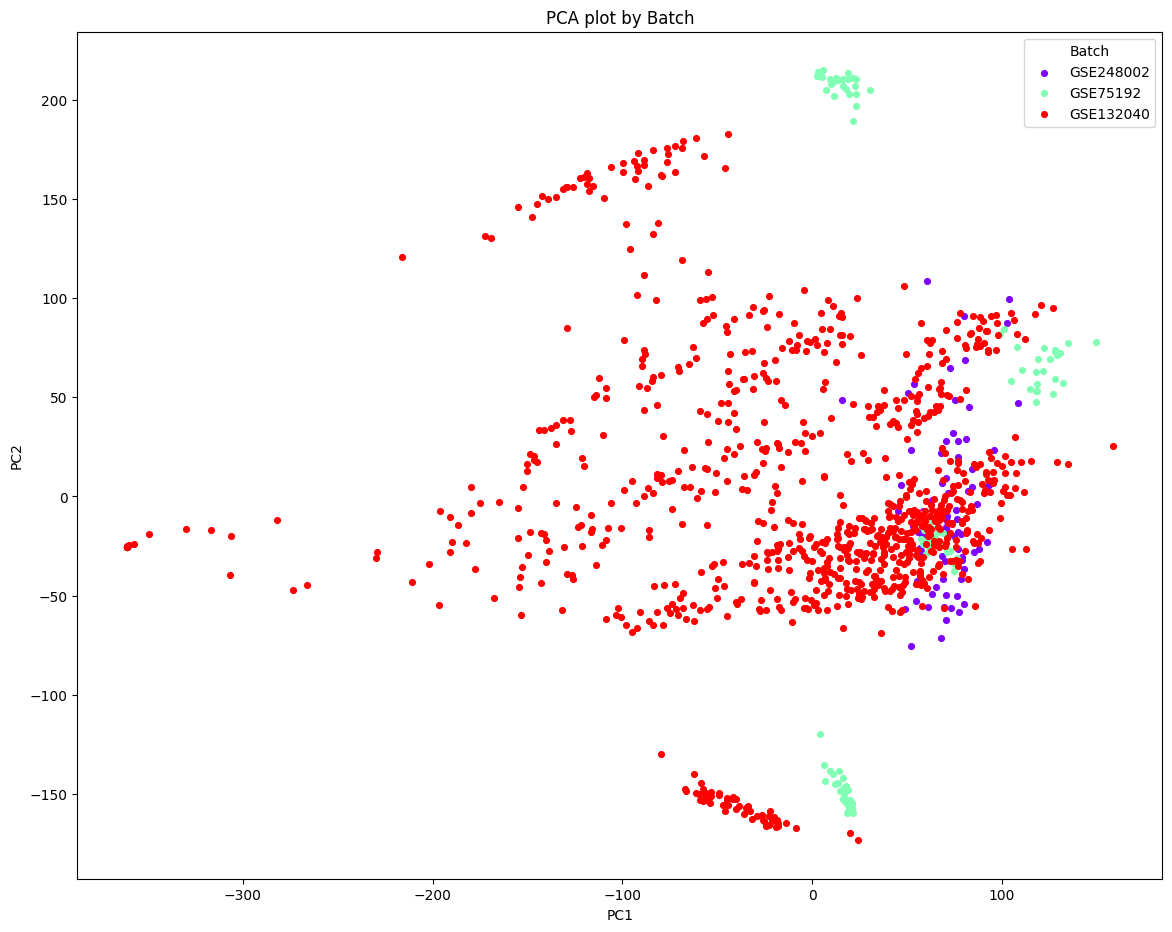

In [ ]:
unique_labels = set(batch_labels)
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))


for label,color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels) if b == label]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot by Batch')

plt.legend(title='Batch')

plt.show()

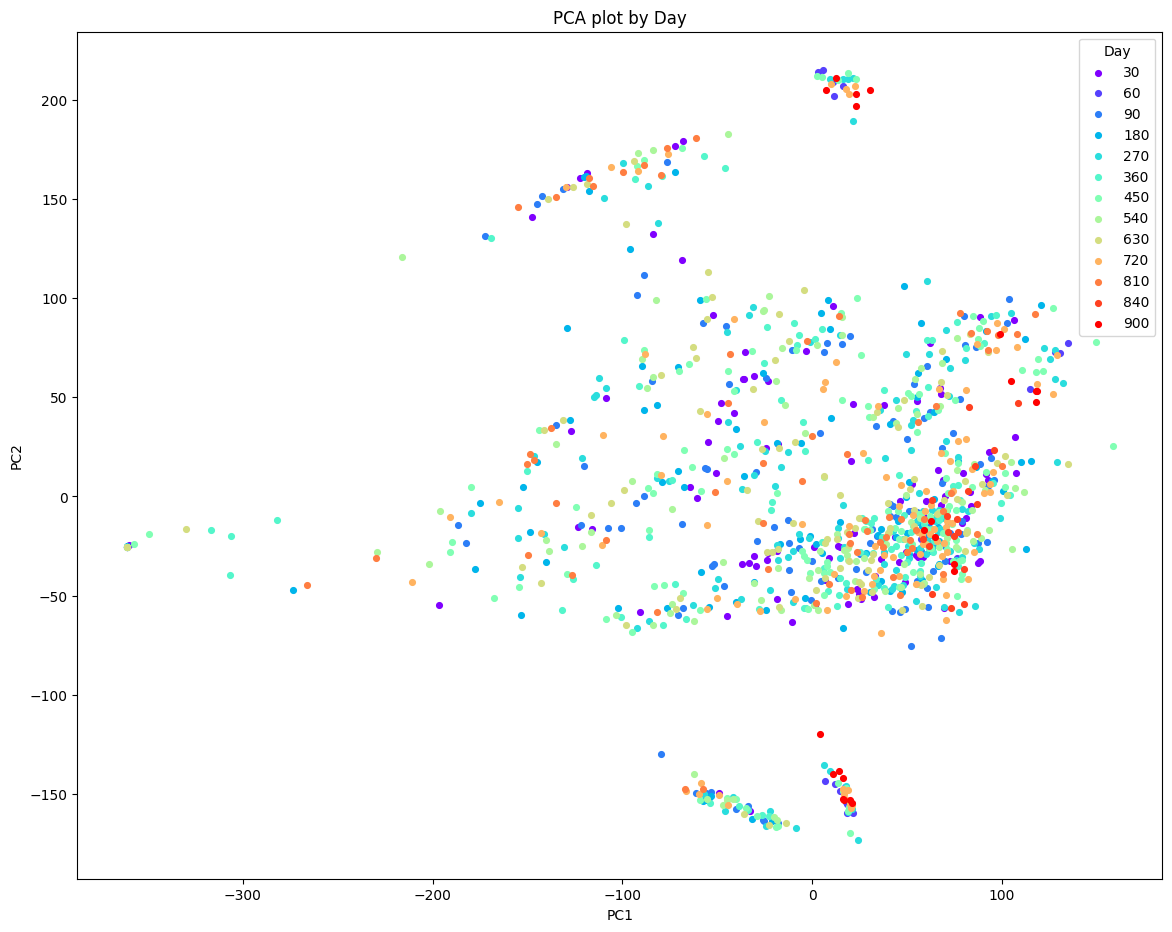

In [ ]:
unique_labels = sorted(set(batch_labels2))
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))


for label,color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels2) if b == label]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot by Day')

plt.legend(title='Day')

plt.show()

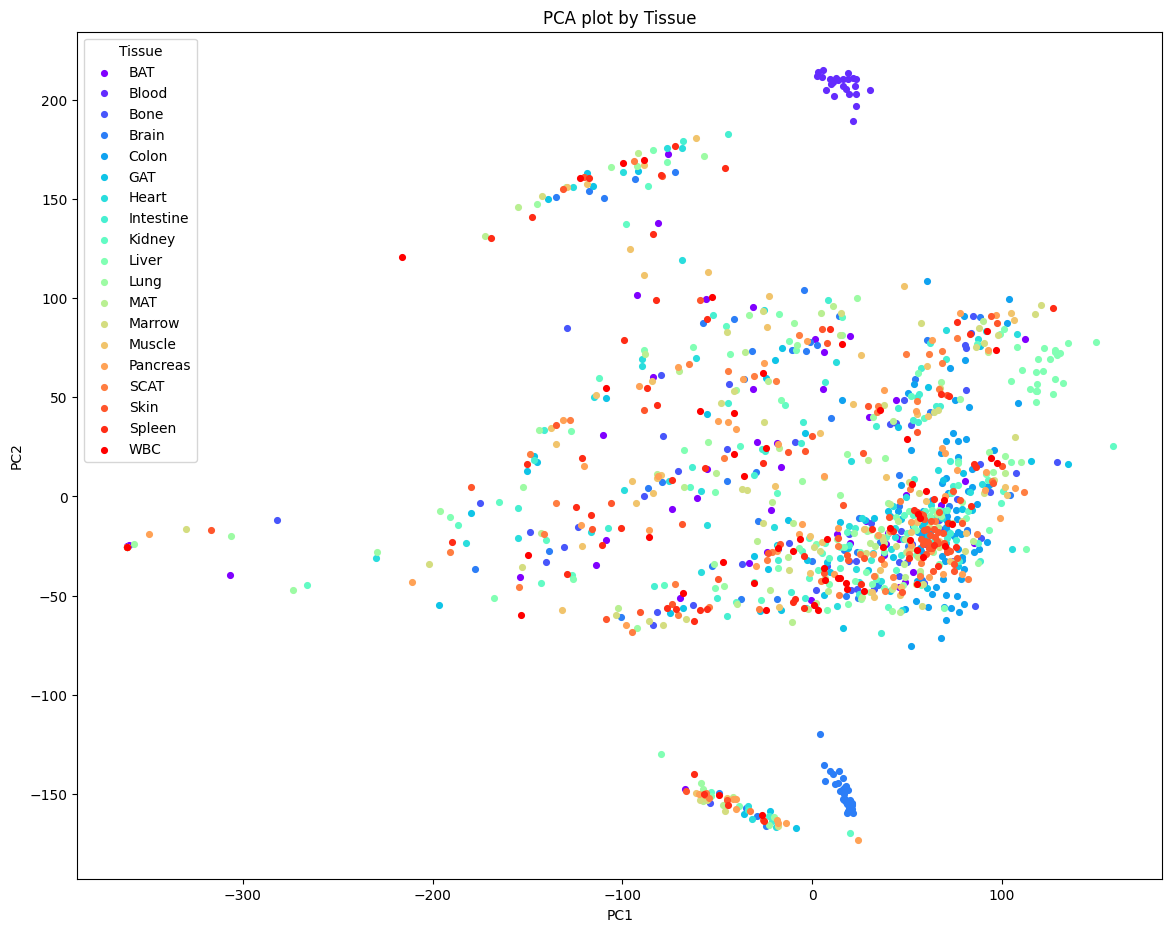

In [ ]:
unique_labels = sorted(set(batch_labels3))
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))


for label,color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels3) if b == label]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot by Tissue')

plt.legend(title='Tissue')

plt.show()

In [ ]:
reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.7, random_state=42)
umap_result = reducer.fit_transform(data)


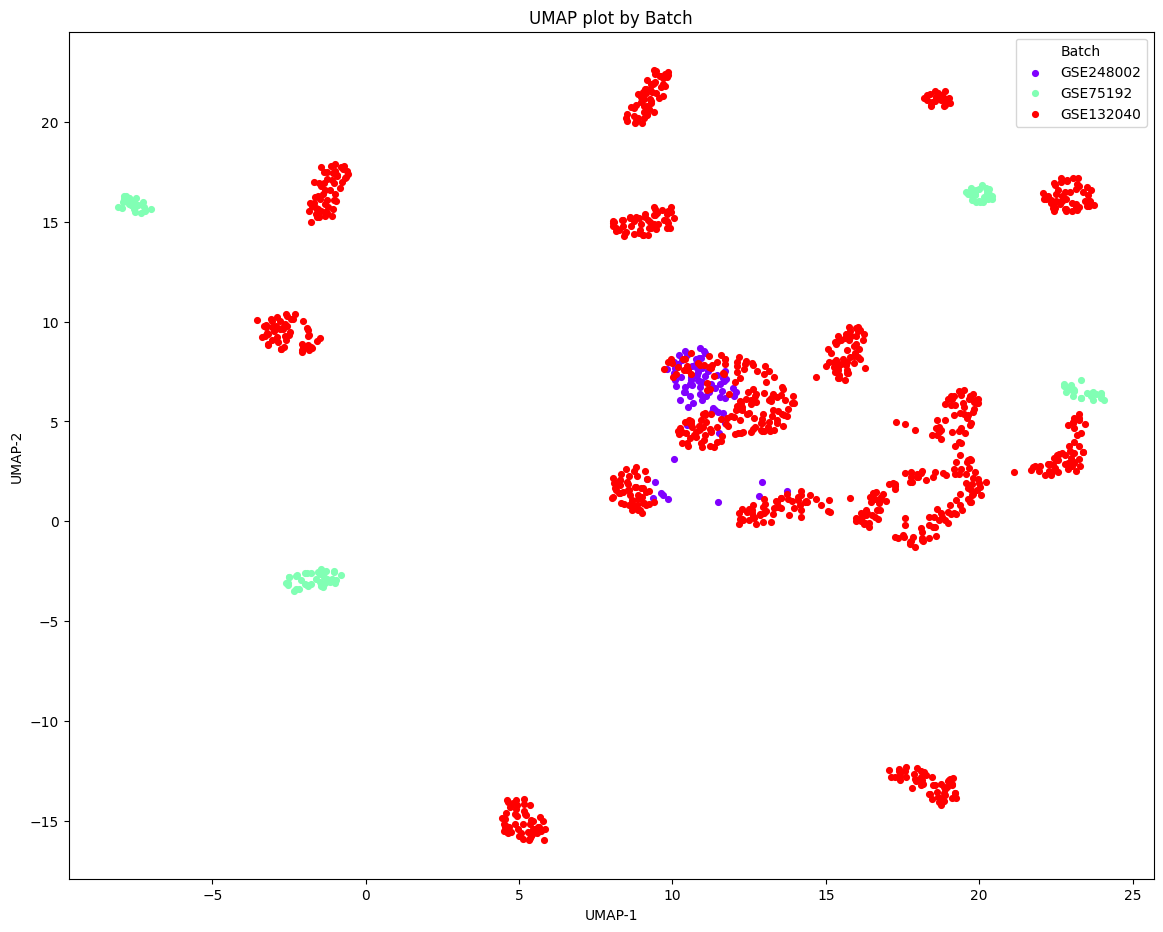

In [ ]:
unique_labels = set(batch_labels)
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))

for label, color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels) if b == label]
    plt.scatter(umap_result[indices, 0], umap_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.title('UMAP plot by Batch')
plt.legend(title='Batch')
plt.show()

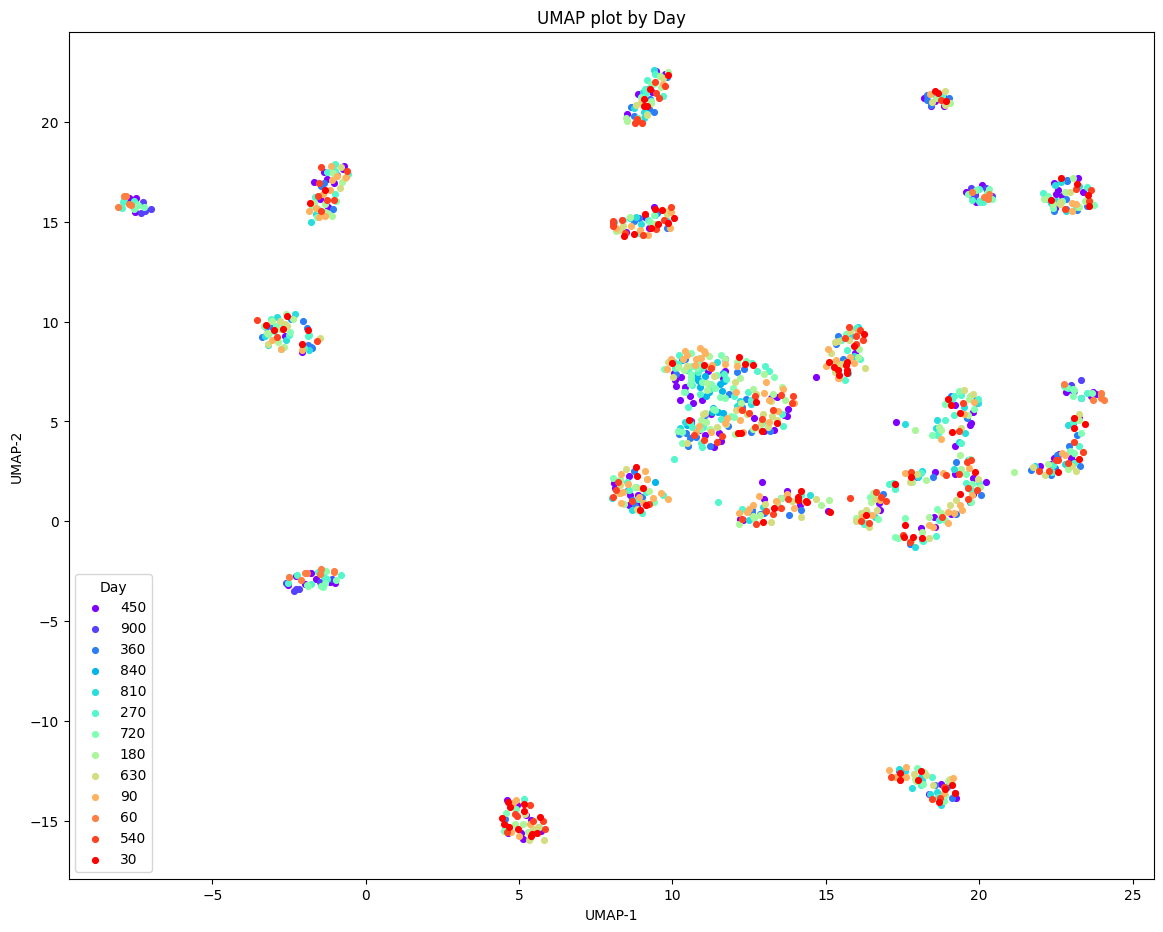

In [ ]:
unique_labels = set(batch_labels2)
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))

for label, color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels2) if b == label]
    plt.scatter(umap_result[indices, 0], umap_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.title('UMAP plot by Day')
plt.legend(title='Day')
plt.show()

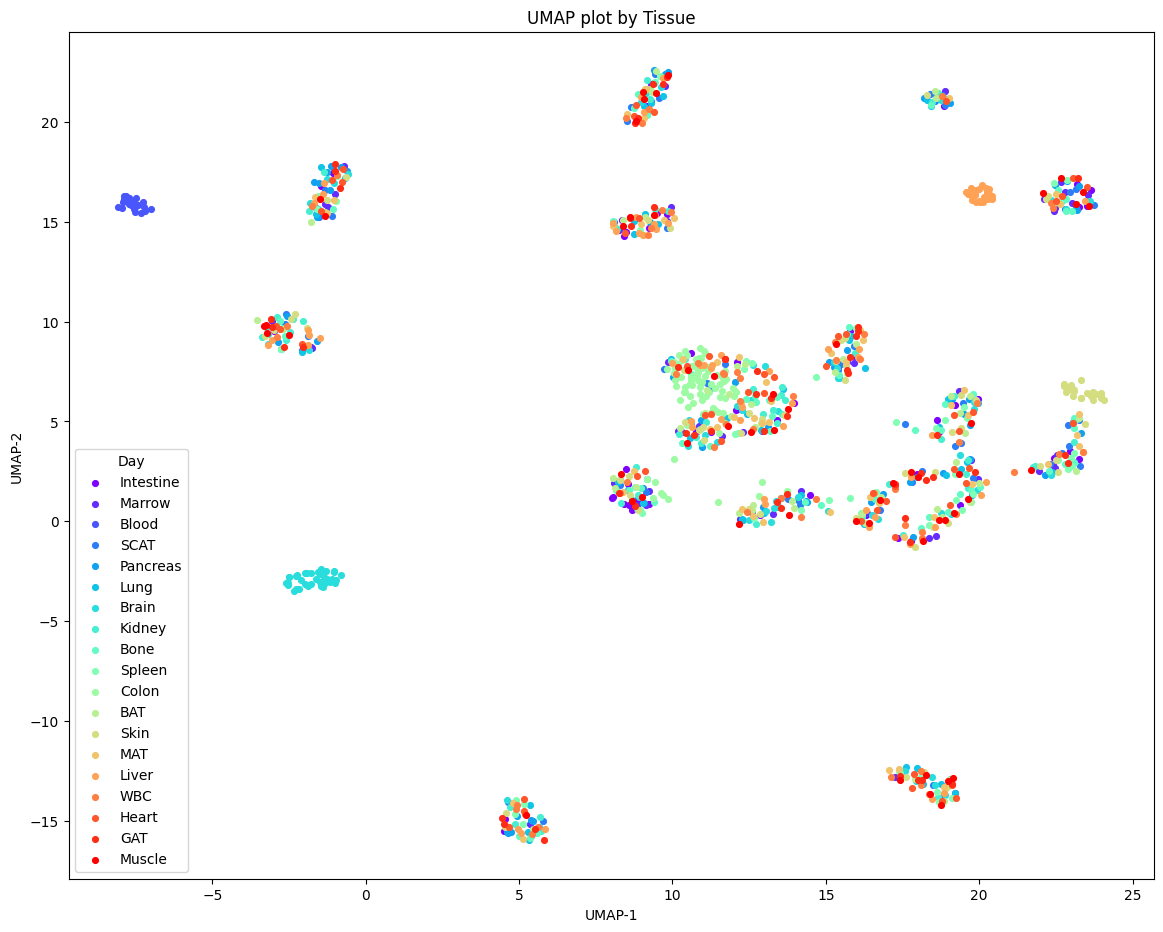

In [ ]:
unique_labels = set(batch_labels3)
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))

for label, color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels3) if b == label]
    plt.scatter(umap_result[indices, 0], umap_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.title('UMAP plot by Tissue')
plt.legend(title='Day')
plt.show()

In [ ]:
# UMAP с 3 компонентами
reducer = umap.UMAP(n_components=3, n_neighbors=30, min_dist=0.6, random_state=42)
umap_3d = reducer.fit_transform(data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
umap_df = pd.DataFrame(umap_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Tissue'] = batch_labels3

fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='Tissue', size_max=5)
fig.update_traces(marker=dict(size=3))
fig.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=50, init='pca')
tsne_result = tsne.fit_transform(data)

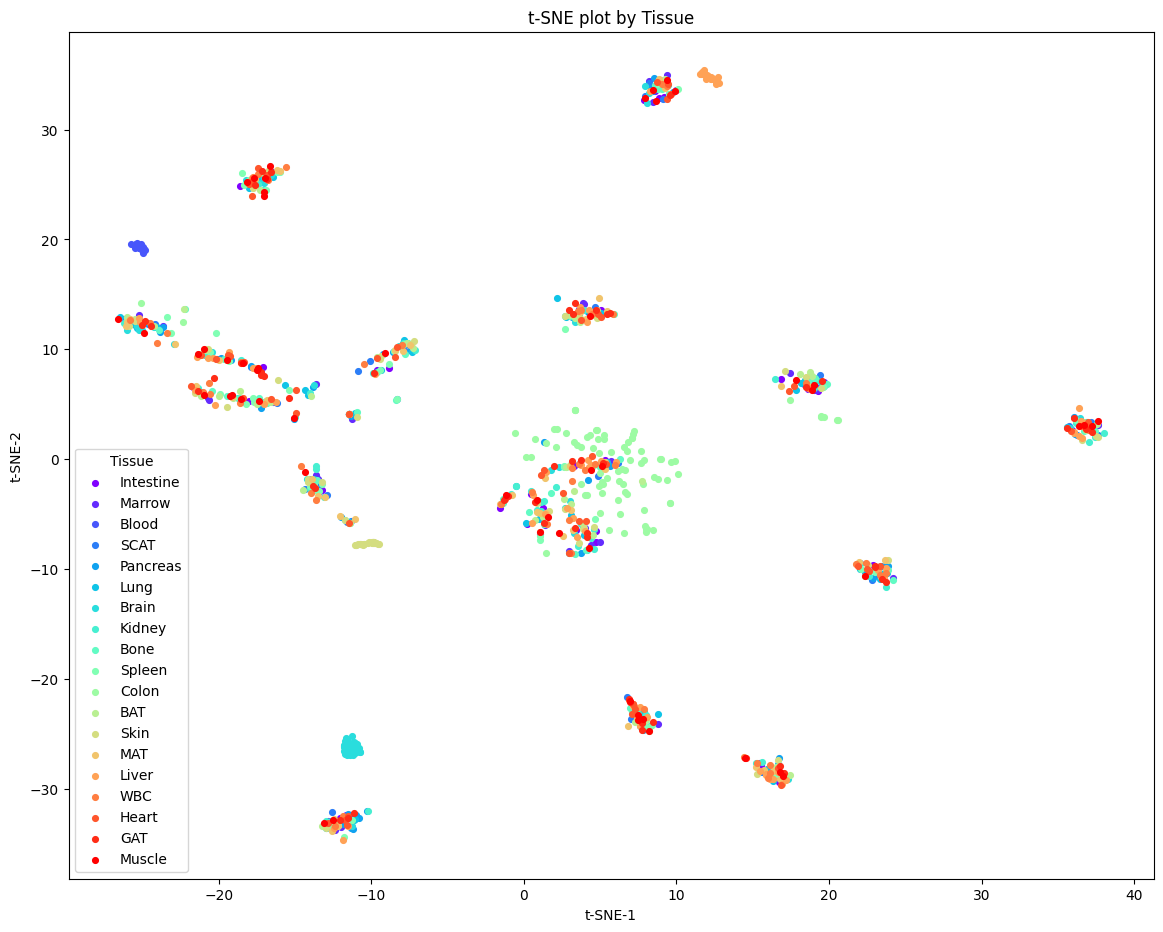

In [ ]:
unique_labels = set(batch_labels3)
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))

for label, color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels3) if b == label]
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.title('t-SNE plot by Tissue')
plt.legend(title='Tissue')
plt.show()

In [ ]:
batch_labels = cs_age['Dataset'].tolist()
batch_labels2 = cs_age['Day'].tolist()
batch_labels3 = cs_age['Tissue'].tolist()
data = cs_age.drop(columns=['Dataset', 'Day', 'Tissue'])

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data.T).T


pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_normalized)

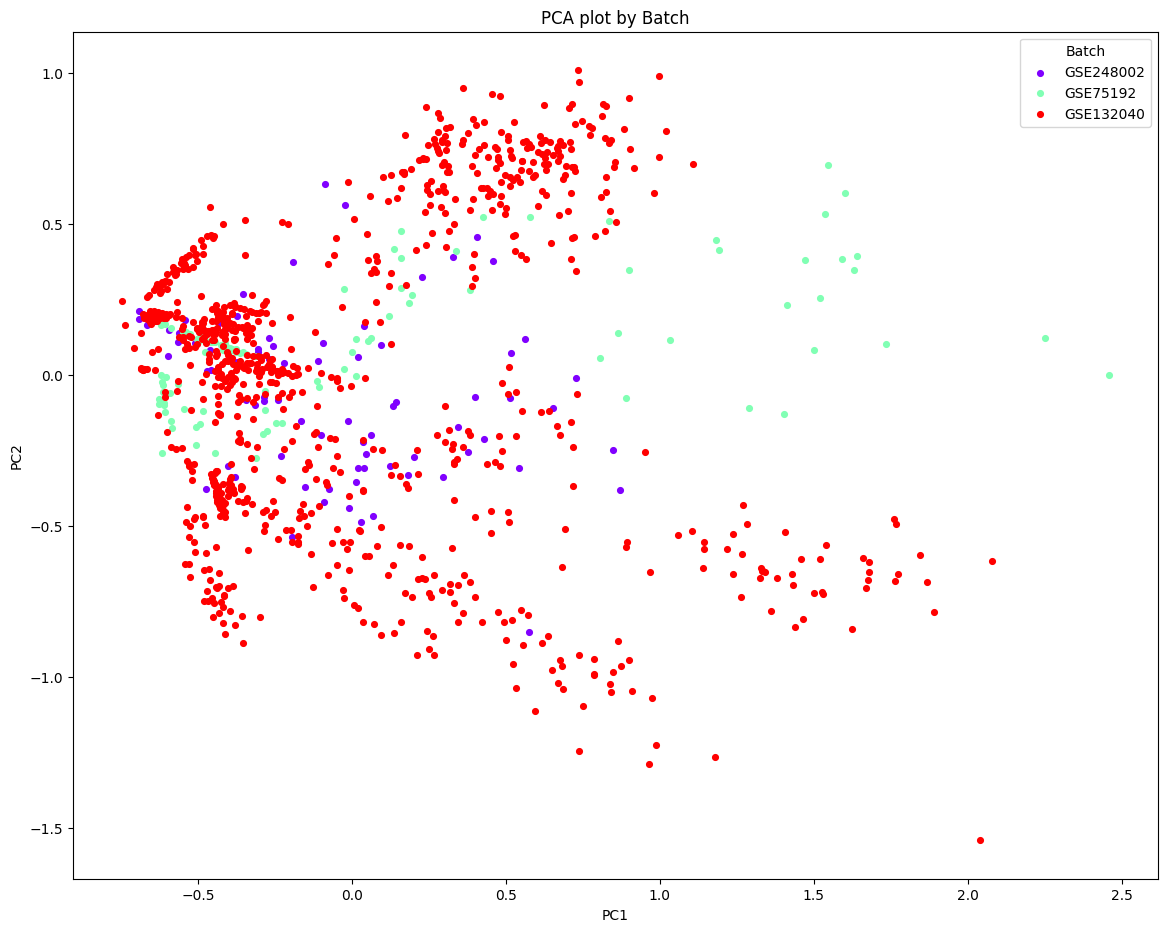

In [ ]:
unique_labels = set(batch_labels)
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))


for label,color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels) if b == label]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot by Batch')

plt.legend(title='Batch')

plt.show()

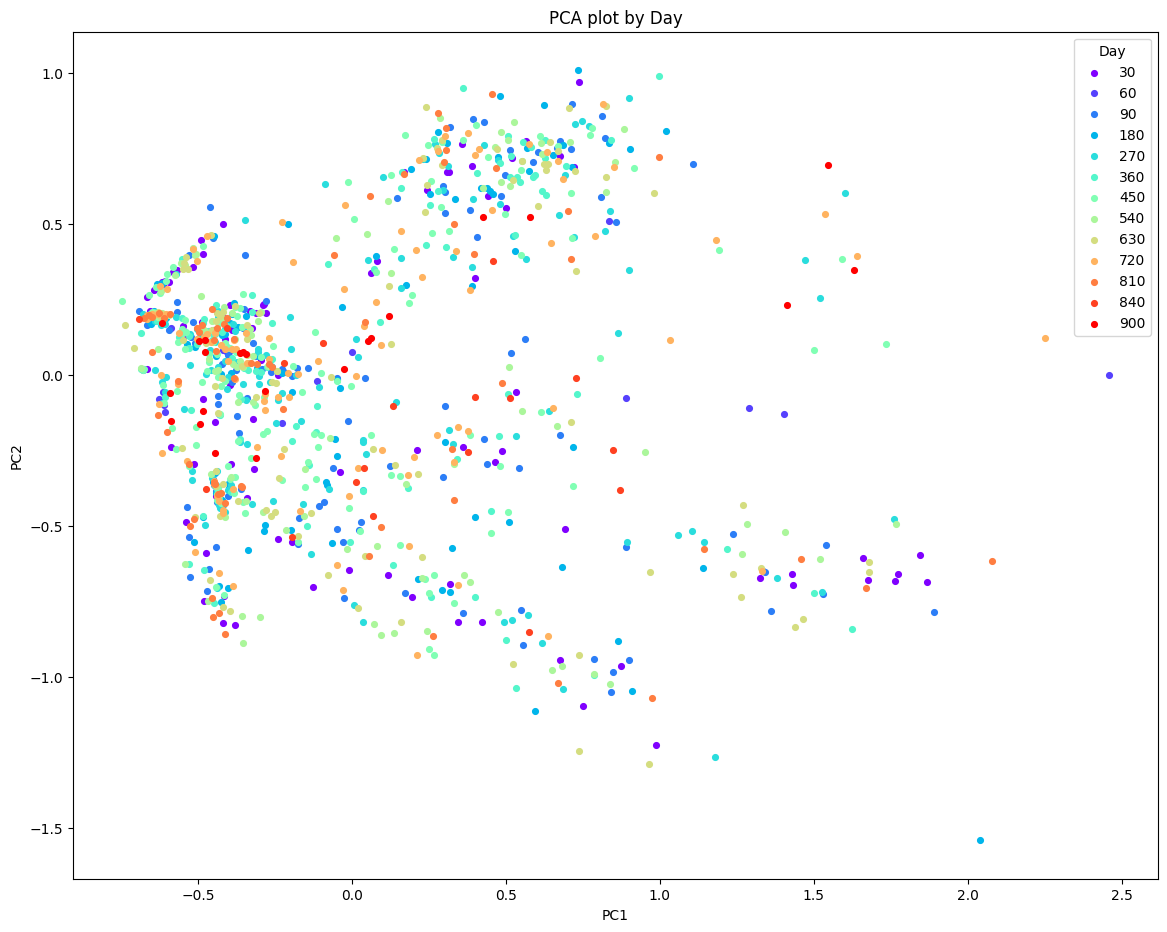

In [ ]:
unique_labels = sorted(set(batch_labels2))
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))


for label,color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels2) if b == label]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot by Day')

plt.legend(title='Day')

plt.show()

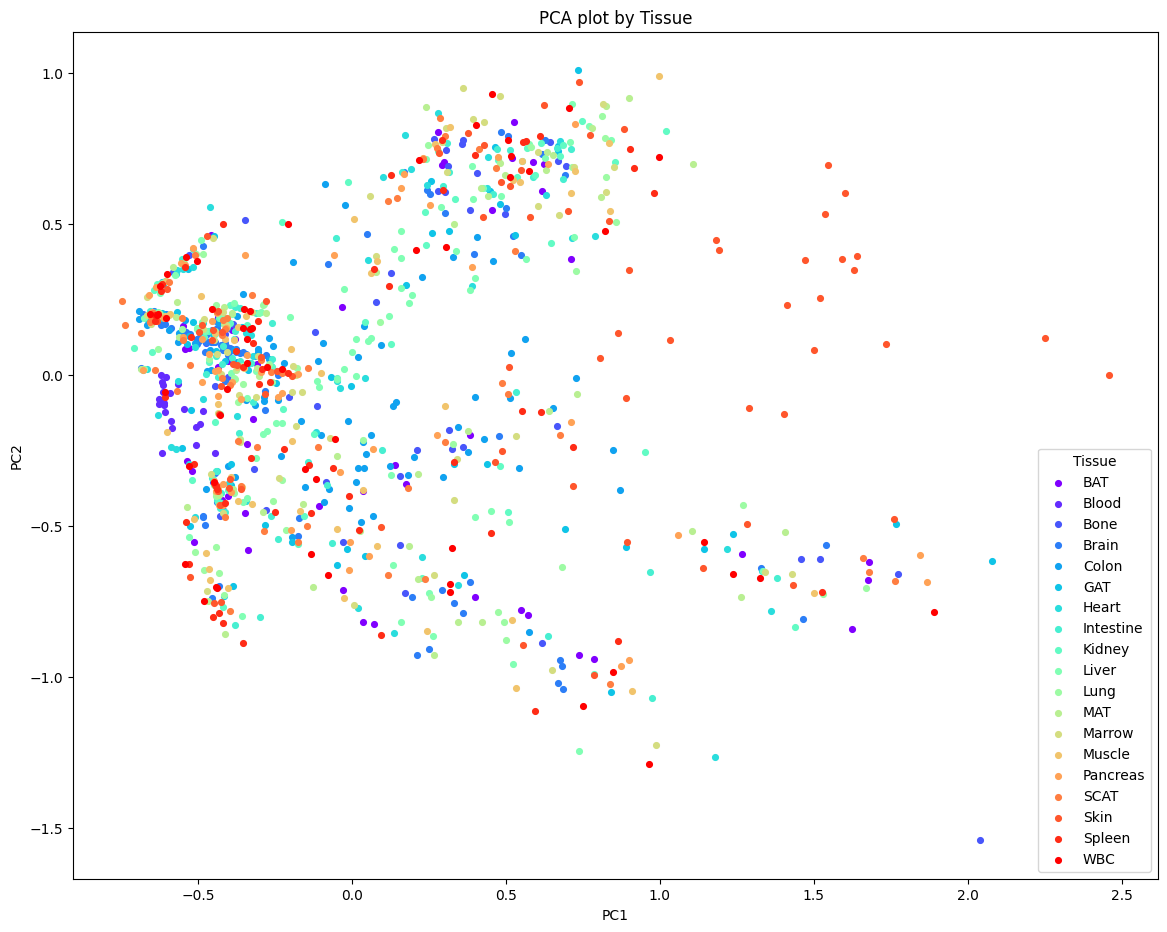

In [ ]:
unique_labels = sorted(set(batch_labels3))
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))


for label,color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels3) if b == label]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot by Tissue')

plt.legend(title='Tissue')

plt.show()

In [ ]:
batch_labels = deseq_age['Dataset'].tolist()
batch_labels2 = deseq_age['Day'].tolist()
batch_labels3 = deseq_age['Tissue'].tolist()
data = deseq_age.drop(columns=['Dataset', 'Day', 'Tissue'])

In [ ]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.T).T


pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_normalized)

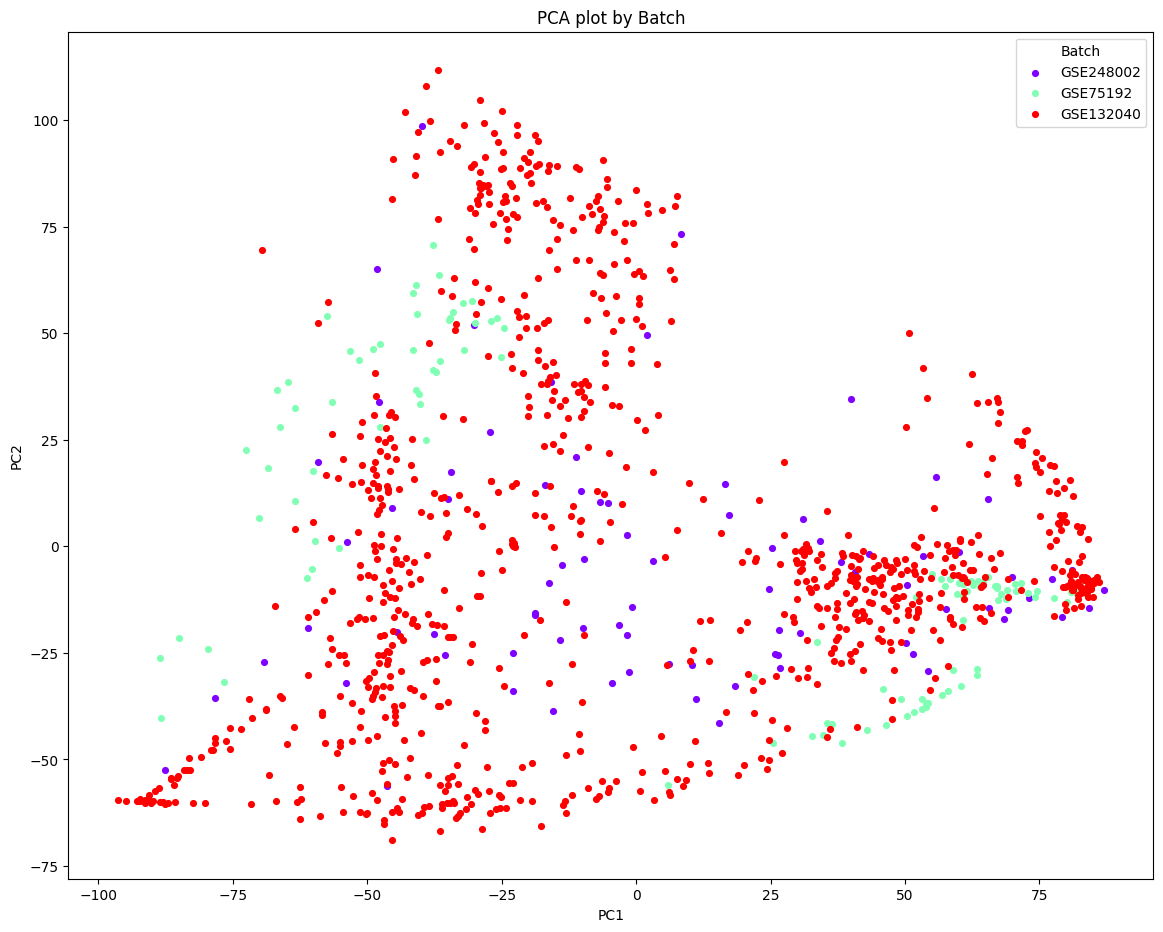

In [ ]:
unique_labels = set(batch_labels)
colors = cm.rainbow(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(14, 11))


for label,color in zip(unique_labels, colors):
    indices = [i for i, b in enumerate(batch_labels) if b == label]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, color=color, s=17)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot by Batch')

plt.legend(title='Batch')

plt.show()